In [1]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
from IPython.display import display

In [2]:
# Визначаємо шлях до зображення та глибину кольору
depths = [8, 16, 32, 64]
image_path = 'image.jpg'

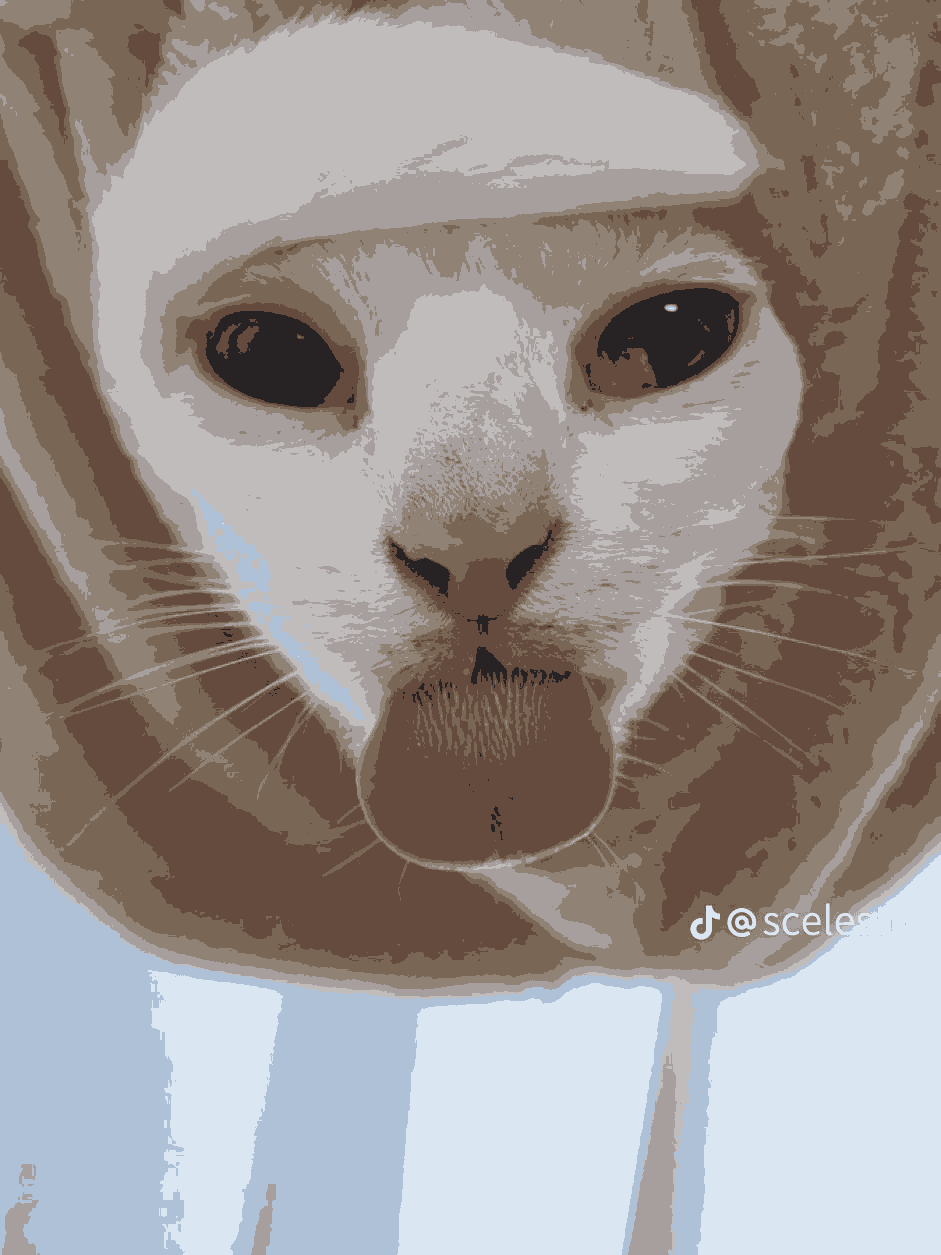

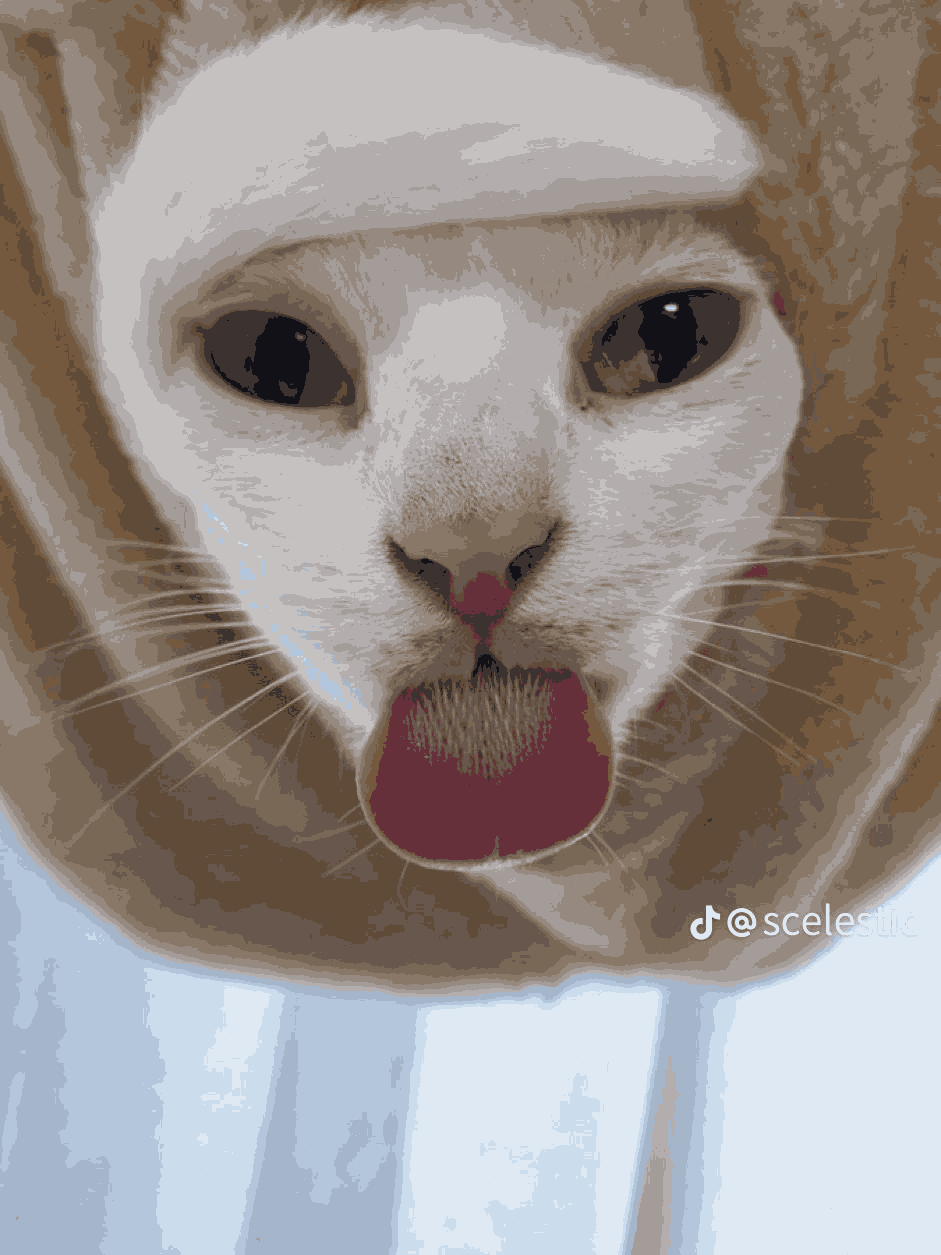

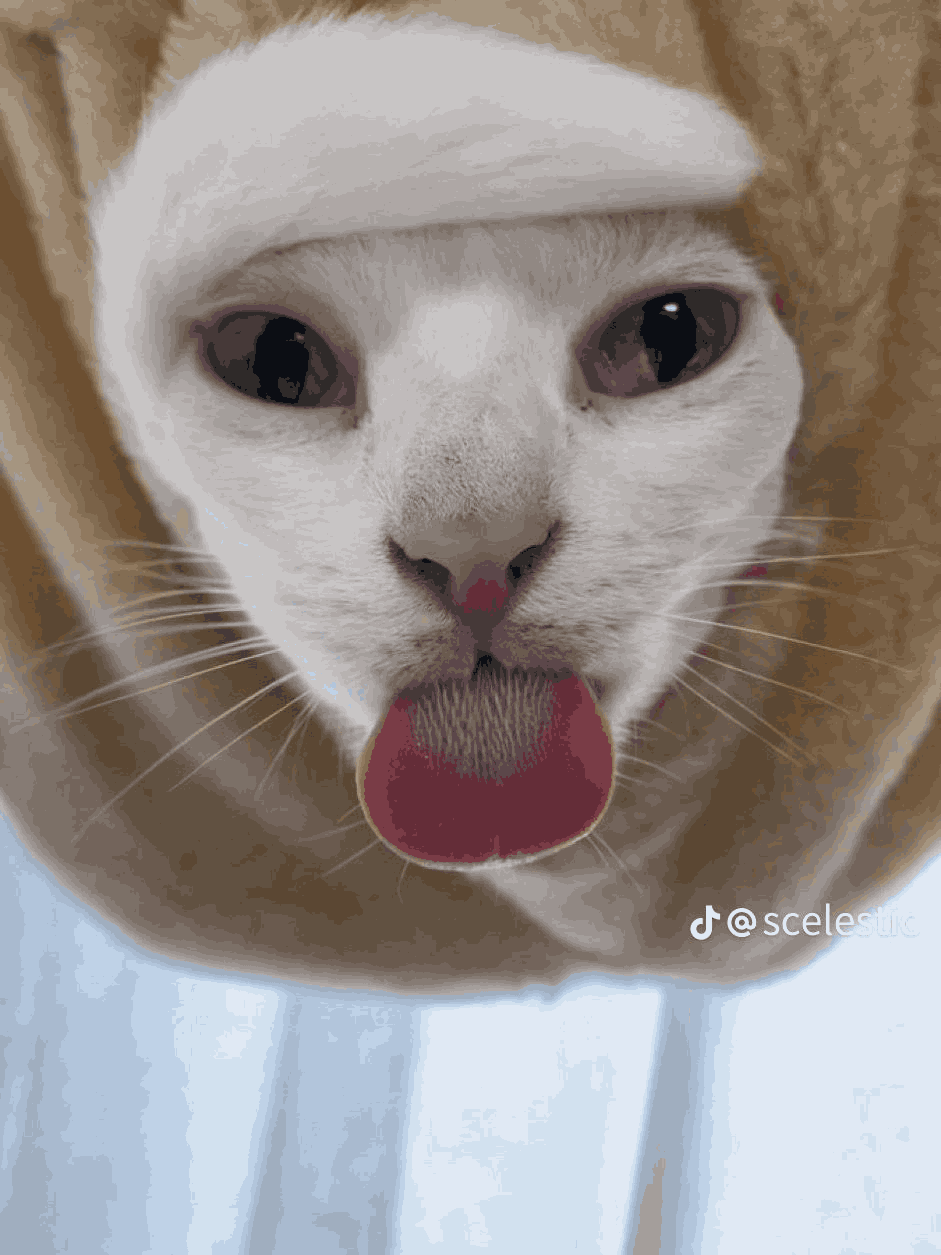

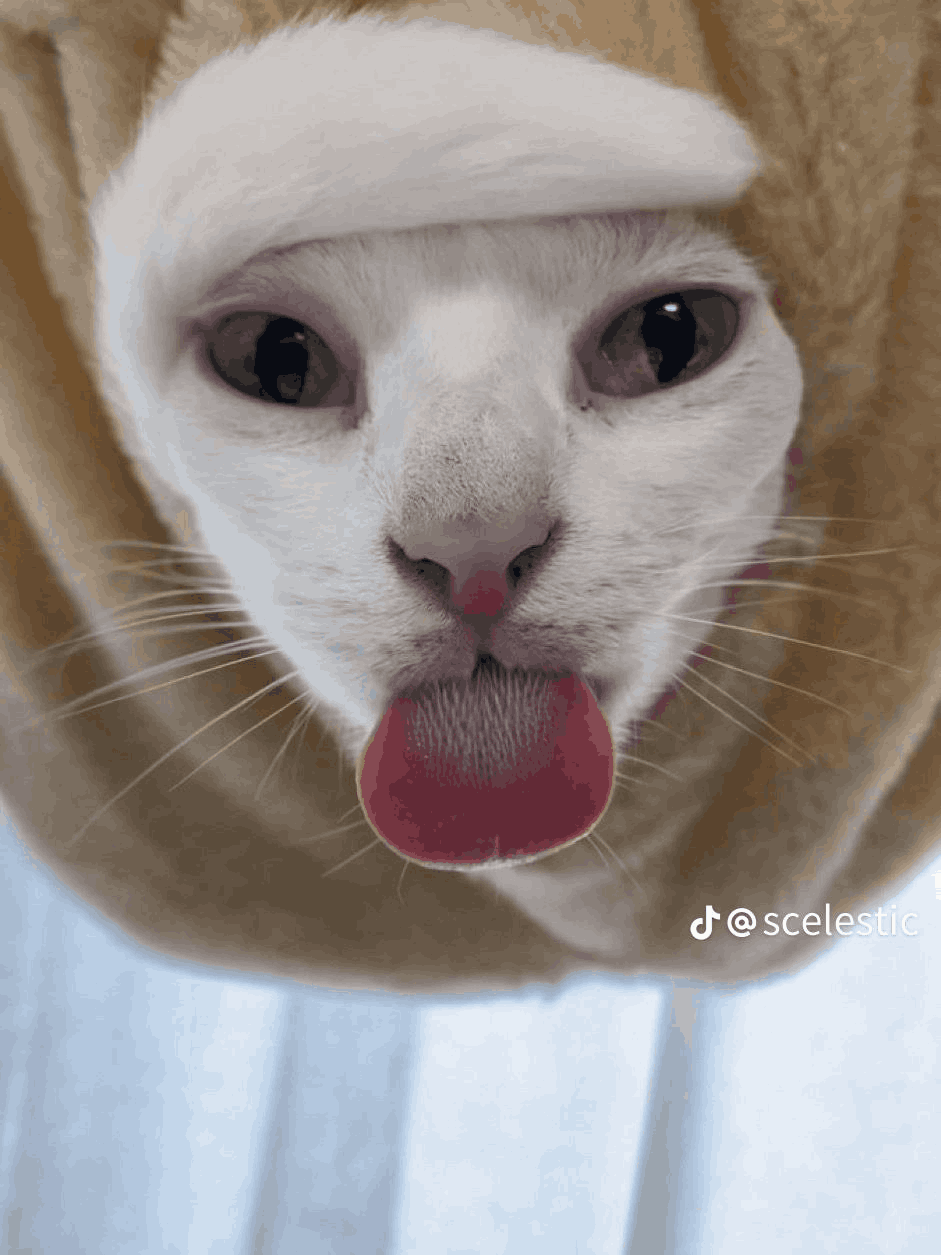

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


In [3]:
# Цикл для кожної глибини кольору
for depth in depths:
    # Завантажуємо зображення та конвертуємо його в RGB
    image = Image.open(image_path)
    image = image.convert('RGB')

    # Конвертуємо зображення в numpy масив
    np_image = np.array(image)
    w, h, d = np_image.shape

    # Змінюємо форму масиву до 2D
    np_image = np.reshape(np_image, (w * h, d))

    # Використовуємо k-середніх для кластеризації
    kmeans = KMeans(n_clusters=depth)
    kmeans.fit(np_image)

    # Квантуюємо пікселі
    quantized_image = kmeans.cluster_centers_[kmeans.labels_]
    quantized_image = np.reshape(quantized_image, (w, h, d))
    quantized_image = quantized_image.astype(np.uint8)

    # Повертаємо зображення та відображаємо його
    quantized_image = Image.fromarray(quantized_image)
    display(quantized_image)